In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset

In [20]:
heart_data=pd.read_csv(r'H:\heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory Data Analysis (EDA)

In [21]:
print("Shape(heart_data) :",heart_data.shape,"\n")
print("\nData types:\n",heart_data.dtypes,"\n")
print("\nMissing values:\n",heart_data.isnull().sum(),"\n")
print("\nInformation :",heart_data.info(),"\n")
print("\nDescriptive statistics:\n", heart_data.describe(),"\n")

Shape(heart_data) : (303, 14) 


Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object 


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg

# Visualizing the target variable distribution


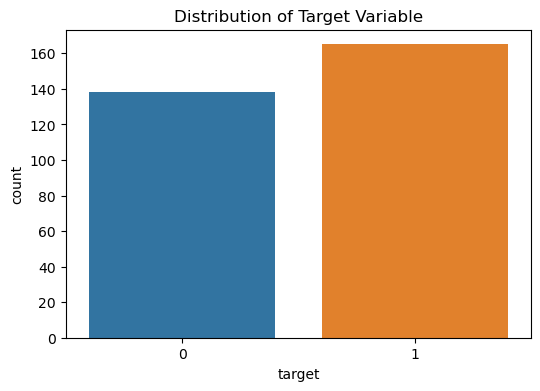

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Target Variable')
plt.show()

# Visualizing correlation matrix

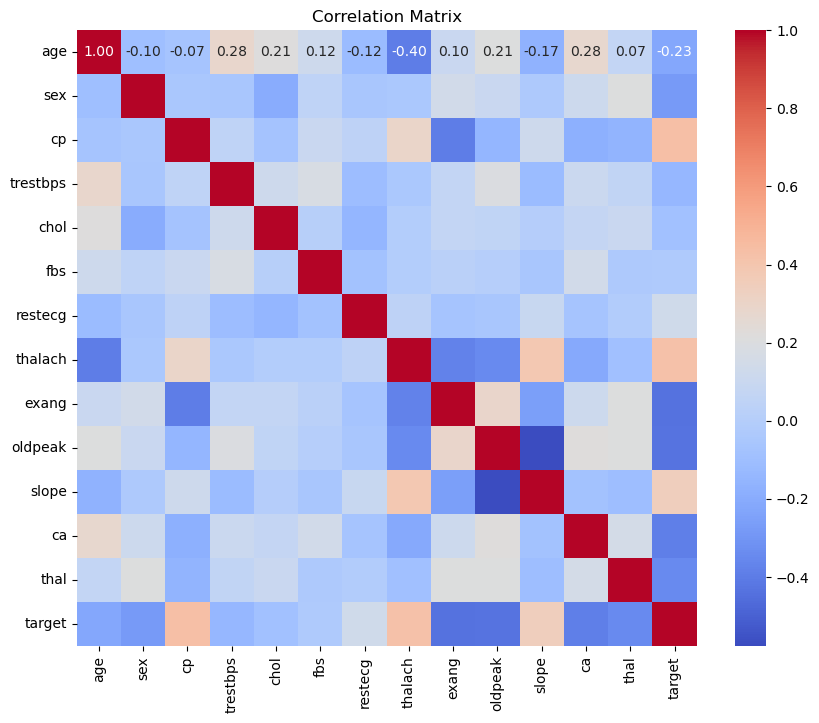

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data preprocessing


In [24]:
X = heart_data.drop('target', axis=1)   #تنبؤ
y = heart_data['target']                #تصنيف

# Splitting the dataset into training and testing sets


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Logistic Regression model


In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Making predictions


In [28]:
predictions = model.predict(X_test_scaled)

# Evaluating the model


In [29]:
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)


Accuracy: 0.8524590163934426


# Classification report


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Confusion matrix


In [31]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[25  4]
 [ 5 27]]


In [32]:
# بيانات جديدة للتوقع
new_data = pd.DataFrame({
    'age': [45],
    'sex': [1],
    'cp': [2],
    'trestbps': [120],
    'chol': [240],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.5],
    'slope': [1],
    'ca': [0],
    'thal': [2]
})

# تحويل بيانات جديدة
new_data_scaled = scaler.transform(new_data)

# التنبؤ باستخدام النموذج

# Use predict_proba to get the probability estimates
probabilities = model.predict_proba(new_data_scaled)

# Display the percentage chance that the person has the disease
print("Percentage chance of having the disease:", probabilities[0][1] * 100, "%")

Percentage chance of having the disease: 70.35062582369356 %


In [ ]:
joblib.dump(data, 'filename.pkl')
